# TimeSeries Analysis

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [230]:
df=pd.read_csv('df_air1_cleaned_01Jan2017.csv')
df.drop(['Unnamed: 0','level_0','index'],axis=1, inplace=True)

In [231]:
df_all=df[['Date','Ground','Year','Month','Day','latitude','longititude','loccountry','Aboard_num','Fatalities_num','Fatalities_ratio',
          'Survived_num','Survival_ratio','Manufacturer_ac_type','reason_crash']]

In [232]:
df_all.head()

,Date,Ground,Year,Month,Day,latitude,longititude,loccountry,Aboard_num,Fatalities_num,Fatalities_ratio,Survived_num,Survival_ratio,Manufacturer_ac_type,reason_crash
0,1921-08-24,1.0,1921,8,24,53.633976,-0.276514,United Kingdom,46,46,1.000000,0,0.000000,None,engine error
1,1921-09-06,0.0,1921,9,6,48.856614,2.352222,France,5,5,1.000000,0,0.000000,None,None
2,1921-12-05,0.0,1921,12,5,-25.874280,118.840646,Australia,3,3,1.000000,0,0.000000,Bristol Aeroplane Company,landing-takeoff
3,1922-01-14,5.0,1922,1,14,48.856614,2.352222,France,5,5,1.000000,0,0.000000,None,None
4,1922-02-21,0.0,1922,2,21,36.850769,-76.285873,United States,45,34,0.755556,11,0.244444,None,None


In [233]:
df_all.sort_values('Date', inplace=True) #sorting the dataframe with Date column
df_all.set_index('Date', inplace=True) # setting the index as Date column
df_all.index = pd.to_datetime(df_all.index)

/Users/Reva/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


# Visualisation of people Aboard, Fatalities & Survival on yearly basis

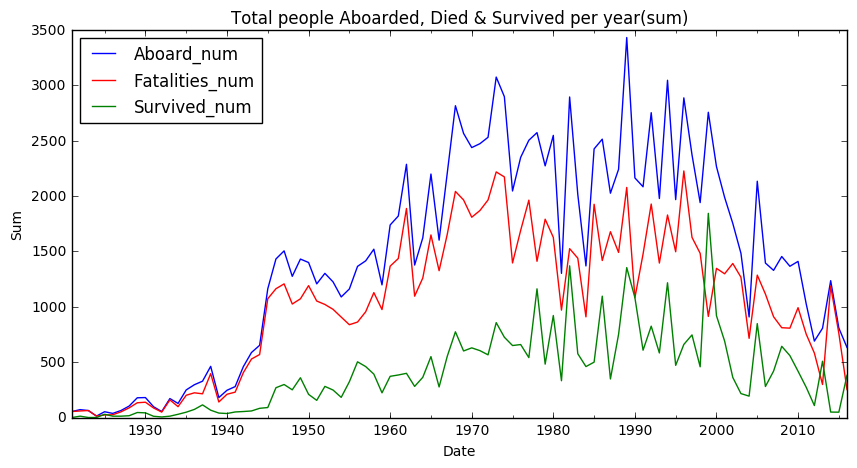

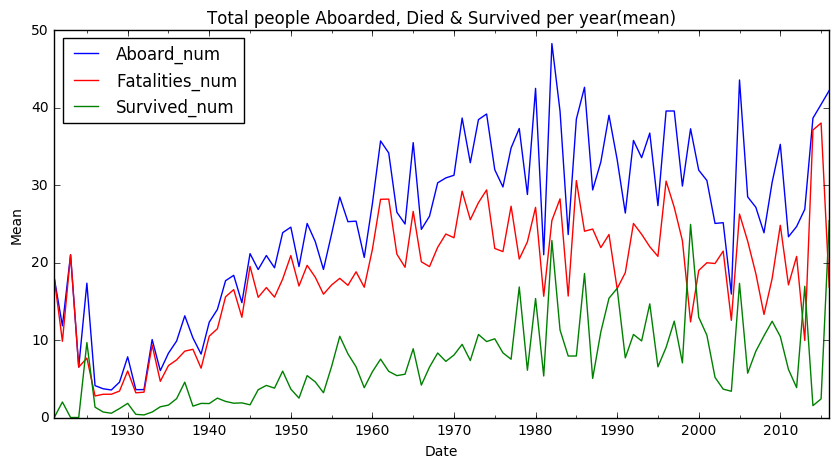

In [290]:
df_all.Aboard_num.resample('AS').sum().plot(figsize=(10,5), color='b', legend='Aboard')
df_all.Fatalities_num.resample('AS').sum().plot(figsize=(10,5), color='r', legend='Fatalities')
df_all.Survived_num.resample('AS').sum().plot(figsize=(10,5), color='g', legend='Survived')
plt.title('Total people Aboarded, Died & Survived per year(sum)')
plt.ylabel('Sum')
plt.show()
df_all.Aboard_num.resample('AS').mean().plot(figsize=(10,5), color='b', legend='Aboard')
df_all.Fatalities_num.resample('AS').mean().plot(figsize=(10,5), color='r', legend='Fatalities')
df_all.Survived_num.resample('AS').mean().plot(figsize=(10,5), color='g', legend='Survived')
plt.title('Total people Aboarded, Died & Survived per year(mean)')
plt.ylabel('Mean')
plt.show()

## Analysis of above Graph:
    - Sum of Fatalities and Survival graph shows that over the years the fatalities and aboarded number also increased from 1950 till 1990.
    - After 1990 the fatalities has decreased. 
    - It might be due to standards, maintenance of aircrafts increased in the years from 1990 where the experiment of aircrafts standardised and skilled pilots and more control over the flights. 
    - The interesting trend is to see after 2000, the sum of fatalities has fallen drastically and may be it will go down in coming years due to the increased aircraft safety. 
    - Mean of Surivial number is 8 and it ranges, every year it ranges between 8 and 20. As the fatalities decreasing and survival also decreasing which makes reasonsable in this case.
   __Next Step__:
    - Time series analysis on Fatalities mean value per very year which seems much of trend and predictable.
    - Frist will start with python timerseries and checking the autocorrelation

# Autocorrelation Fatalities

In [317]:
from pandas.tools.plotting import autocorrelation_plot

Auto correlation value for lag of 1 year: 0.652342770612
Auto correlation value for lag of 2 years: 0.615665848845


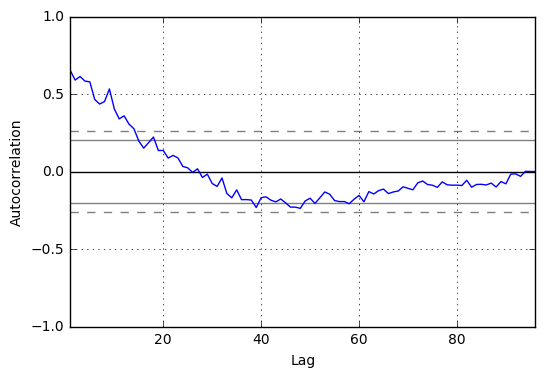

In [331]:
print "Auto correlation value for lag of 1 year:",df_all.Fatalities_num.resample('AS').mean().autocorr(lag=1)
print "Auto correlation value for lag of 2 years:",df_all.Fatalities_num.resample('AS').mean().autocorr(lag=2)

autocorrelation_plot(df_all.Fatalities_num.resample('AS').mean())
plt.show()


- For the lag of 1 year and 2 years the autocorrelation values are between 0.65 and 0.61. I would like to procced and analyse more and able to predict for atleast 1 year/2 years and see the values.

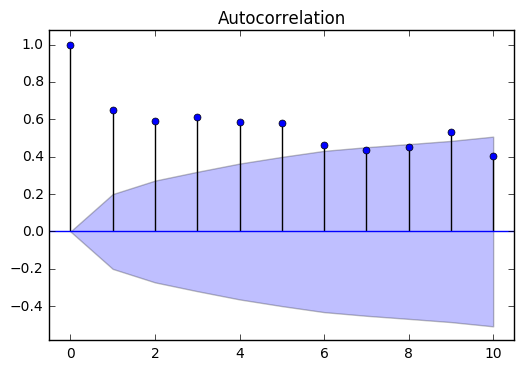

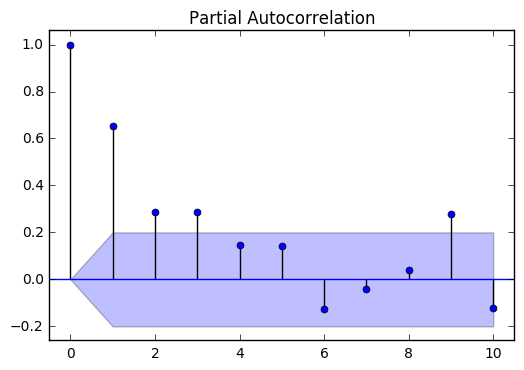

In [336]:
# Lets plot the ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_all.Fatalities_num.resample('AS').mean(), lags=10)
plot_pacf(df_all.Fatalities_num.resample('AS').mean(), lags=10)
print ""

In [347]:
dta=df_all.Fatalities_num.resample('AS').mean()
dta = pd.DataFrame(dta)
dta.head()

,Fatalities_num
Date,
1921-01-01,18.000000
1922-01-01,9.833333
1923-01-01,21.000000
1924-01-01,6.500000
1925-01-01,7.666667


In [348]:
dta.to_csv('dta.csv')

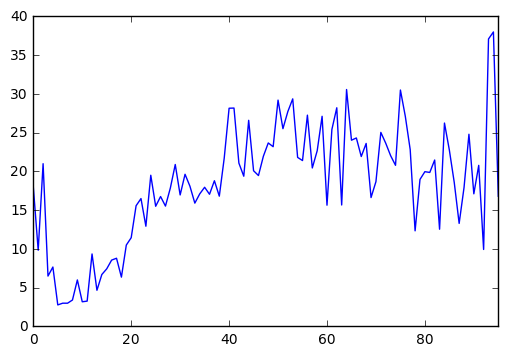

In [344]:
dta['Fatalities_num'].plot()

# Stats model - ARIMA Python

/Users/Reva/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


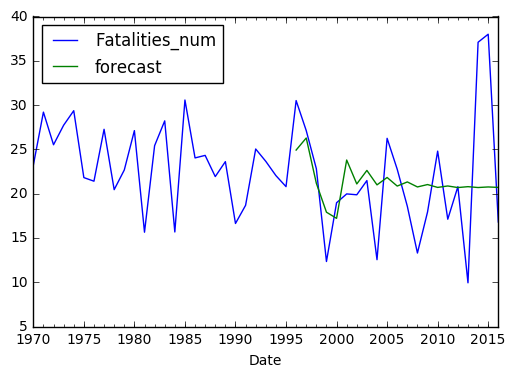

In [353]:
import statsmodels as sm
res = sm.tsa.arima_model.ARIMA(dta, (3,0, 8)).fit()
fig, ax = plt.subplots()
ax = dta.ix['1970-01-01':].plot(ax=ax)
fig = res.plot_predict('1996-01-01', '2016-01-01', dynamic=True, ax=ax, 
                       plot_insample=False)
plt.show()

In [351]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:         Fatalities_num   No. Observations:                   96
Model:                     ARMA(3, 8)   Log Likelihood                -281.821
Method:                       css-mle   S.D. of innovations              4.196
Date:                Wed, 11 Jan 2017   AIC                            589.642
Time:                        14:10:17   BIC                            622.979
Sample:                    01-01-1921   HQIC                           603.117
                         - 01-01-2016                                         
========================================================================================
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                   20.7589      3.271      6.346      0.000        14.347    27.171
ar.L1.Fatalities_num     0.7903      0.118      6.701      0.000         0.559     1.022
ar.L2.Fatalities_num     0.5591      0.151      3.704      0.000         0.263     0.855
ar.L3.Fatalities_num    -0.4705      0.129     -3.640      0.000        -0.724    -0.217
ma.L1.Fatalities_num    -0.6047      0.122     -4.941      0.000        -0.845    -0.365
ma.L2.Fatalities_num    -0.5895      0.157     -3.762      0.000        -0.897    -0.282
ma.L3.Fatalities_num     0.9260      0.173      5.356      0.000         0.587     1.265
ma.L4.Fatalities_num    -0.2462      0.158     -1.558      0.123        -0.556     0.063
ma.L5.Fatalities_num     0.2172      0.213      1.020      0.311        -0.200     0.635
ma.L6.Fatalities_num    -0.2102      0.136     -1.541      0.127        -0.478     0.057
ma.L7.Fatalities_num    -0.3736      0.137     -2.736      0.008        -0.641    -0.106
ma.L8.Fatalities_num     0.7824      0.131      5.961      0.000         0.525     1.040
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3158           -0.0000j            1.3158           -0.5000
AR.2            1.2521           -0.2181j            1.2709           -0.0274
AR.3            1.2521           +0.2181j            1.2709            0.0274
MA.1           -0.9819           -0.1896j            1.0000           -0.4696
MA.2           -0.9819           +0.1896j            1.0000            0.4696
MA.3           -0.3303           -1.0770j            1.1265           -0.2974
MA.4           -0.3303           +1.0770j            1.1265            0.2974
MA.5            0.6116           -0.7919j            1.0006           -0.1453
MA.6            0.6116           +0.7919j            1.0006            0.1453
MA.7            0.9393           -0.3520j            1.0031           -0.0571
MA.8            0.9393           +0.3520j            1.0031            0.0571
-----------------------------------------------------------------------------
"""

# R package TimeSeries

In [354]:
%load_ext rpy2.ipython
%R require(ggplot2)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


array([1], dtype=int32)

In [410]:
%%R
# Now we install and "import" the forecasting library. (you might already have it from the TSA lesson)
# Docs: https://cran.r-project.org/web/packages/forecast/forecast.pdf
install.packages("forecast", repos="http://R-Forge.R-project.org")
library("forecast")

In [358]:
%%R
air<-read.csv("dta.csv",header=T,sep=",")
air.index<-(air$Date)
head(air)


        Date Fatalities_num
1 1921-01-01      18.000000
2 1922-01-01       9.833333
3 1923-01-01      21.000000
4 1924-01-01       6.500000
5 1925-01-01       7.666667
6 1926-01-01       2.777778


In [359]:
%R -i dta

In [361]:
%%R 
head(dta)

                    Fatalities_num
1921-01-01 00:00:00      18.000000
1922-01-01 00:00:00       9.833333
1923-01-01 00:00:00      21.000000
1924-01-01 00:00:00       6.500000
1925-01-01 00:00:00       7.666667
1926-01-01 00:00:00       2.777778


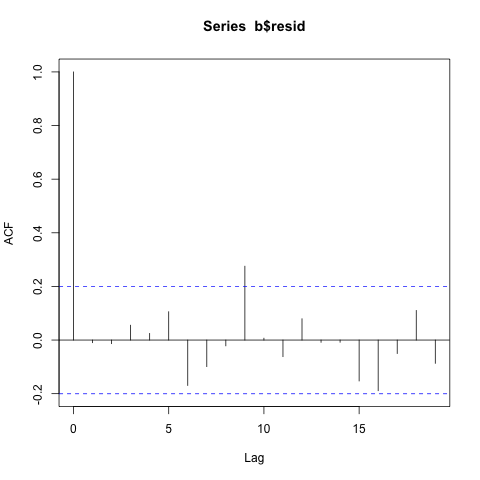

In [363]:
%%R

# We manually fit a seasonal ARIMA and check the residuals. We can see that almost no spike is 
#above the insignificance level.
b <- arima(air[,2],c(3,1,1),seasonal=list(order=c(1,0,0), 5))
acf(b$resid)

In [365]:
%%R
tsdata = ts(air[,2], frequency=5)
head(tsdata)

[1] 18.000000  9.833333 21.000000  6.500000  7.666667  2.777778


## Checking trend, seasonality for Fatalities mean

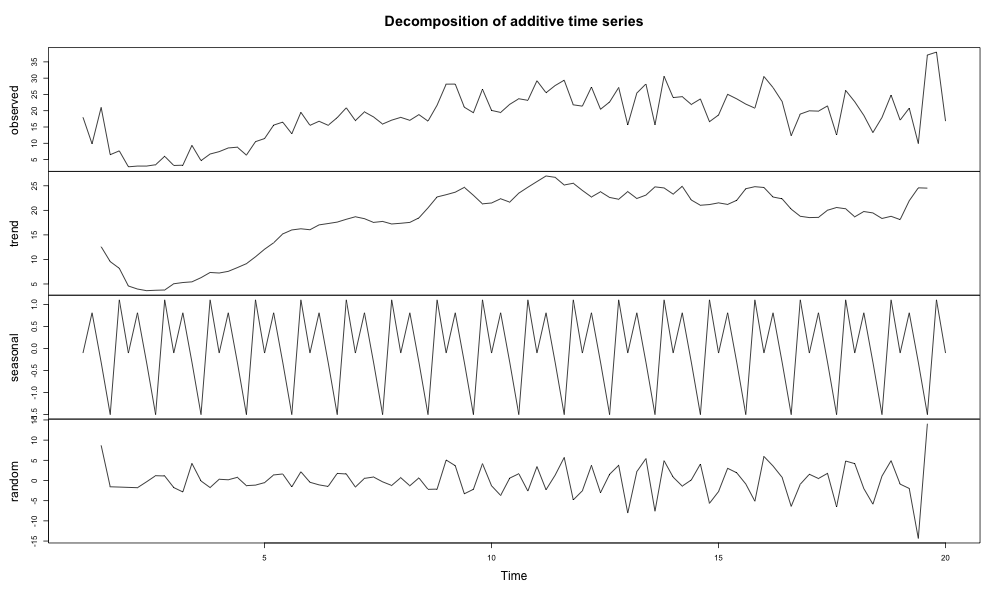

In [371]:
%%R -w 1000 -h 600 -u px
components.ts = decompose(tsdata)
plot(components.ts)

## R - ARIMA Model


Call:
arima(x = air[, 2], order = c(5, 1, 17), seasonal = list(order = c(1, 0, 0), 
    5))

Coefficients:
          ar1      ar2      ar3     ar4    ar5     ma1      ma2     ma3     ma4
      -0.4549  -0.3305  -0.1958  -0.046  0.698  0.4821  -0.1921  0.2812  0.1047
s.e.   0.2923   0.3569   0.3408   0.303  0.250  0.3664   0.3886  0.2317  0.2216
          ma5      ma6     ma7      ma8     ma9    ma10     ma11    ma12
      -0.6652  -0.0045  0.1397  -0.4282  0.5282  0.4942  -0.2345  0.4079
s.e.   0.2415   0.2098  0.2359   0.2232  0.2087  0.2221   0.2567  0.2349
        ma13     ma14     ma15     ma16     ma17     sar1
      0.2009  -0.5796  -0.6551  -0.0902  -0.1863  -0.7020
s.e.  0.1939   0.2221   0.1895   0.2826   0.2482   0.2002

sigma^2 estimated as 12.91:  log likelihood = -270.18,  aic = 588.36
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.3242077 3.574511 2.817587 -5.207891 22.88501 0.6220186
                    ACF1
Training set -0.03542788

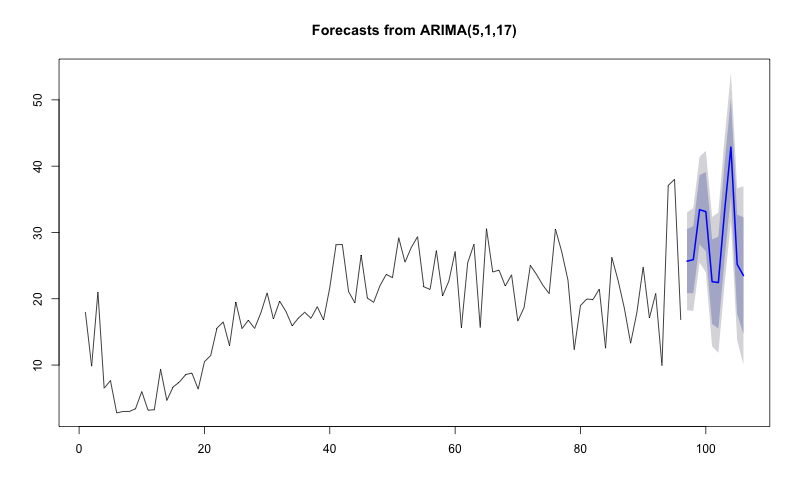

In [419]:
%%R -w 800 -h 500 -u px
# We can also predict and plot the predictions, including the confidence levels (two standard devs).
c <- arima(air[,2],c(5,1,17),seasonal=list(order=c(1,0,0), 5))
pr2 <- predict(c,n.ahead=5)
#ts.plot(window(air[,2],start=50),pr2$pred,pr2$pred+2*pr2$se,pr2$pred-2*pr2$se, lty=c(1,2,3,3))
print(c)
print(accuracy(c))
plot(forecast(c,h=10))

### R-ARIMA Model Analysis:
    - R ARIMA model provides much better flexibility to to adjust the (p,d,q) values compared to stats model tried before. 
    - After trying multiple occurrences of these values the best one was (5,1,17) which resulted in less Root mean square error (3.574511)

In [413]:
# The below modeling for the period from 1970 to 1980 and see how the predictions


Call:
arima(x = air[, 2], order = c(3, 0, 8), seasonal = list(order = c(1, 0, 0), 
    5))

Coefficients:
         ar1      ar2     ar3      ma1     ma2     ma3      ma4     ma5
      1.0058  -0.8013  0.7131  -0.2602  0.5505  0.1873  -0.2071  0.4943
s.e.  0.1679   0.1893  0.1170   0.5465  0.4434  0.4959   0.2323  0.2033
          ma6      ma7      ma8     sar1  intercept
      -0.2720  -0.2881  -0.1787  -0.4846    18.9683
s.e.   0.3601   0.3377   0.2047   0.5277     3.3616

sigma^2 estimated as 20.05:  log likelihood = -285.23,  aic = 598.47
                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.09431937 4.478156 3.441291 -12.45445 28.22628 0.7597093
                    ACF1
Training set -0.01255086


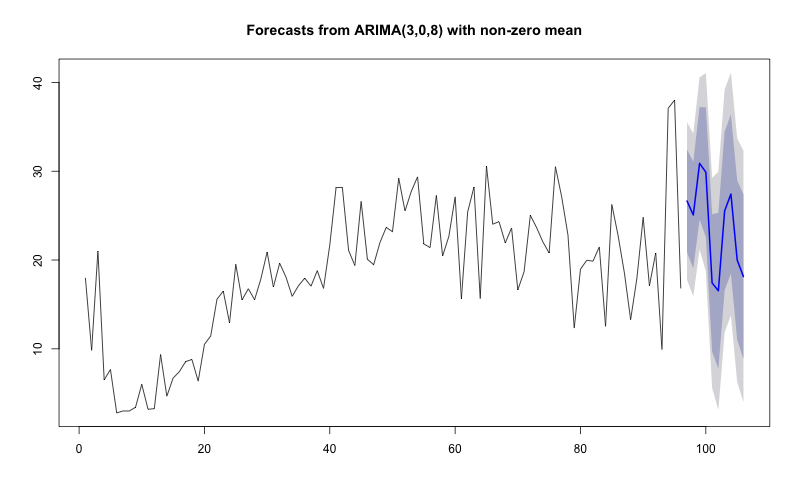

In [376]:
%%R -w 800 -h 500 -u px
# We can also predict and plot the predictions, including the confidence levels (two standard devs).
c <- arima(air[,2],c(3,0,8),seasonal=list(order=c(1,0,0), 5))
pr2 <- predict(c,n.ahead=5)
#ts.plot(window(air[,2],start=50),pr2$pred,pr2$pred+2*pr2$se,pr2$pred-2*pr2$se, lty=c(1,2,3,3))
print(c)
print(accuracy(c))
plot(forecast(c,h=10))

# R - Auto ARIMA Model

In [411]:
%%R
model2 <- auto.arima(air[,2], approximation=FALSE,trace=FALSE)

Series: air[, 2] 
ARIMA(0,1,1)                    

Coefficients:
          ma1
      -0.7164
s.e.   0.0735

sigma^2 estimated as 28.05:  log likelihood=-293.02
AIC=590.03   AICc=590.16   BIC=595.14
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.3149541 5.240444 3.857576 -10.65441 29.90675 0.8516095
                     ACF1
Training set -0.001783515


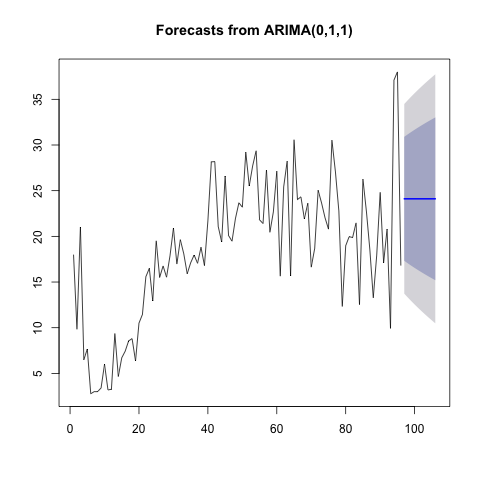

In [412]:
%%R
print(model2)
print(accuracy(model2))
plot(forecast(model2,h=10))

# Conclusions

Fatalities mean values for each year is showing some trend and little bit of seasonality. Even though it wasn't much seasonality of sine waves. But it has some tred which interested me in doing some analysis in time series.

Initial model of stats model ARIMA model didn't provide much of flexibility and forecast wasn't good enough. So used R package of ARIMA models. This resulted in much better RMSE and the forecast curve look much better. After the manual tuning of ARIMA model with (5,1,17) resulted better time series predictions. But the AUTO ARIMA model didn't provide any of best results.